In [1]:
#include <iostream>
#include <cmath>
#include <fstream>
#include <sstream>
#include <vector>
#include <algorithm>
#include "../include/MSc_projects_gnuplot.hpp"
#include "../include/MSc_projects_pde_solvers.hpp"
#include "xeus/xjson.hpp"

In [2]:
.L ../lib/libMSc_Math_Finance_2018LIB.so

In [3]:
// ONLY RUN THIS CELL ONCE AT THE START
// allow for figures to be plotted
xeus::xjson mime_bundle_repr(const MSC_PROJECTS::gnuplotImage& i)
{
    auto bundle = xeus::xjson::object();
    bundle["image/png"] = MSC_PROJECTS::encode64(i.imageText);
    return bundle;
}
// gnuplot functions
MSC_PROJECTS::GnuplotWidget G;
MSC_PROJECTS::gnuplotImage figure1,figure2;

In [4]:
// ONLY RUN THIS CELL ONCE AT THE START
// problem parameters
double Gamma,sigma,r,mu,T,xMin,xMax;
std::vector<double> X,pt,Jt,investmentYield;

In [15]:
Gamma=-3;
sigma=0.05;
r=0.0538;
mu=r+0.02;
T=10;
xMin=0.5; // minimum fund value
xMax=5; // minimum fund value 

5

In [16]:
MSC_PROJECTS::calculateExpectedUtility(xMin,xMax,0.,T,r,mu,sigma,Gamma,2000,X,pt,Jt);

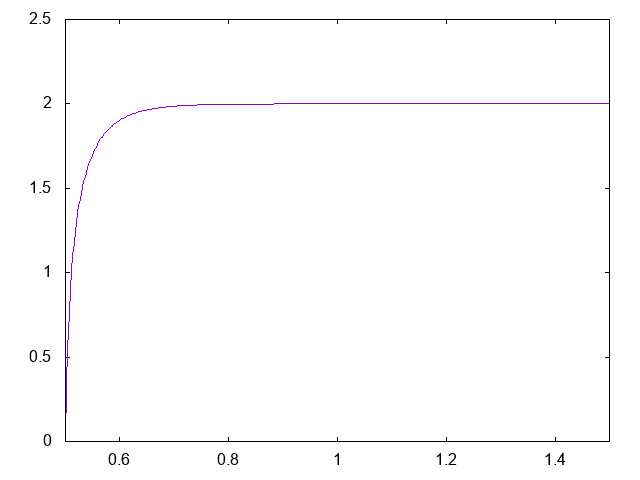

In [17]:
{
    std::stringstream ss("set xrange [0.5:1.5]\n");
    figure1 = G.plotData(X,pt,&ss);
}
figure1

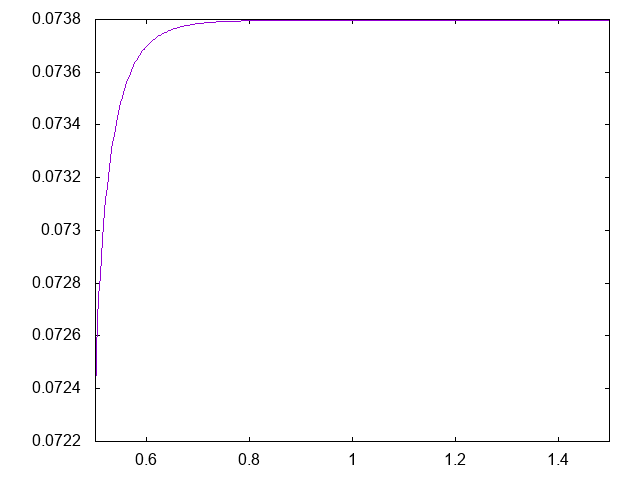

In [18]:

  investmentYield.resize(Jt.size());
  for(int i=0;i<Jt.size();i++)
  {
      // investment yield = 1/T * log(certainty equivalent / initial investment)
      investmentYield[i] = 1./T * log(pow( Gamma * Jt[i] , 1./Gamma ) / X[i]);
  }
  {
    std::stringstream ss("set xrange [0.5:1.5]\n");
    figure2 = G.plotData(X,investmentYield,&ss);
}
figure2

In [13]:
Gamma

-3

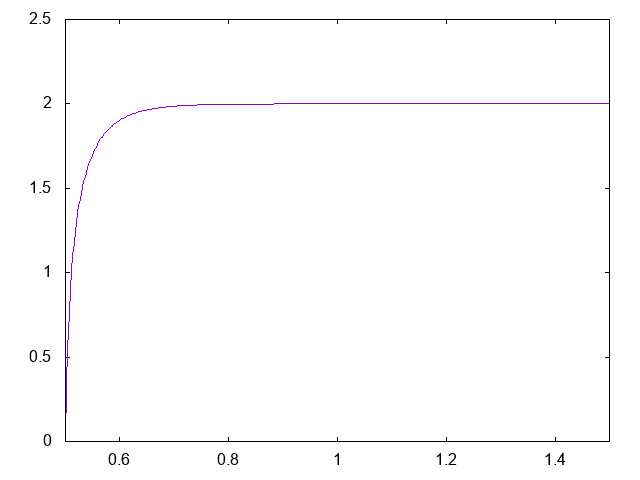

In [14]:
figure1